# Library

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [4]:
df_raw = pd.read_csv("/kaggle/input/mitm-dataset/MitM.csv", low_memory = False)
df_raw.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_invalid,frame.time_relative,ip.src,ip.dst,tcp.srcport,tcp.dstport,eth.src,...,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.username_len,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,type
0,0.000000,0.000000,1.529668e+09,NaN,0.000000,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
1,0.000481,0.000481,1.529668e+09,NaN,0.000481,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
2,0.000423,0.000423,1.529668e+09,NaN,0.000904,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
3,0.000274,0.000274,1.529668e+09,NaN,0.001178,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
4,0.000861,0.000861,1.529668e+09,NaN,0.002039,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal


In [5]:
df_raw.shape

(110668, 67)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110668 entries, 0 to 110667
Data columns (total 67 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.time_delta            110668 non-null  float64
 1   frame.time_delta_displayed  110668 non-null  float64
 2   frame.time_epoch            110668 non-null  float64
 3   frame.time_invalid          0 non-null       float64
 4   frame.time_relative         110668 non-null  float64
 5   ip.src                      102435 non-null  object 
 6   ip.dst                      102435 non-null  object 
 7   tcp.srcport                 99514 non-null   float64
 8   tcp.dstport                 99514 non-null   float64
 9   eth.src                     110668 non-null  object 
 10  eth.dst                     110668 non-null  object 
 11  frame.cap_len               110668 non-null  int64  
 12  frame.coloring_rule.name    0 non-null       float64
 13  frame.coloring

In [8]:
df_raw.isnull().sum()

frame.time_delta                   0
frame.time_delta_displayed         0
frame.time_epoch                   0
frame.time_invalid            110668
frame.time_relative                0
                               ...  
mqtt.willmsg                  110668
mqtt.willmsg_len              110668
mqtt.willtopic                110668
mqtt.willtopic_len            110668
type                               0
Length: 67, dtype: int64

In [9]:
df_raw.describe()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_invalid,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.coloring_rule.name,frame.coloring_rule.string,...,mqtt.sub.qos,mqtt.suback.qos,mqtt.topic_len,mqtt.username,mqtt.username_len,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,110668.000000,110668.000000,1.106680e+05,0.0,110668.000000,99514.000000,99514.000000,110668.000000,0.0,0.0,...,0.0,0.0,2035.00000,0.0,0.0,4.0,0.0,0.0,0.0,0.0
mean,0.042530,0.042530,1.529670e+09,NaN,2359.017074,18620.800460,30743.571266,697.234711,NaN,NaN,...,NaN,NaN,19.47371,NaN,NaN,4.0,NaN,NaN,NaN,NaN
std,0.285306,0.285306,1.322856e+03,NaN,1322.855997,23694.914764,23271.825659,695.599642,NaN,NaN,...,NaN,NaN,2.61748,NaN,NaN,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.000000,1.529668e+09,NaN,0.000000,22.000000,22.000000,20.000000,NaN,NaN,...,NaN,NaN,5.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
25%,0.000087,0.000087,1.529669e+09,NaN,1231.207322,443.000000,443.000000,60.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
50%,0.000138,0.000138,1.529670e+09,NaN,2049.681080,443.000000,40607.000000,146.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
75%,0.001966,0.001966,1.529671e+09,NaN,3498.407867,49176.000000,50766.000000,1514.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
max,9.885142,9.885142,1.529673e+09,NaN,4706.571592,60979.000000,60979.000000,1514.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [10]:
# Drop columns with too many missing values (e.g., 50% or more)
threshold = 0.5
df = df_raw.copy()
df = df.loc[:, df.isnull().mean() < threshold]

# Impute remaining null values using median for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Forward fill for categorical columns (if applicable)
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = df[cat_cols].ffill()

In [11]:
df['type'] = df['type'].map({'normal': 0, 'mitm': 1})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110668 entries, 0 to 110667
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.time_delta            110668 non-null  float64
 1   frame.time_delta_displayed  110668 non-null  float64
 2   frame.time_epoch            110668 non-null  float64
 3   frame.time_relative         110668 non-null  float64
 4   ip.src                      110668 non-null  object 
 5   ip.dst                      110668 non-null  object 
 6   tcp.srcport                 110668 non-null  float64
 7   tcp.dstport                 110668 non-null  float64
 8   eth.src                     110668 non-null  object 
 9   eth.dst                     110668 non-null  object 
 10  frame.cap_len               110668 non-null  float64
 11  frame.encap_type            110668 non-null  float64
 12  frame.ignored               110668 non-null  float64
 13  frame.len     

In [13]:
df.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,ip.src,ip.dst,tcp.srcport,tcp.dstport,eth.src,eth.dst,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift,type
0,0.000000,0.000000,1.529668e+09,0.000000,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,30:5a:3a:62:72:80,134.0,1.0,0.0,134.0,0.0,1.0,0.0,0
1,0.000481,0.000481,1.529668e+09,0.000481,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,30:5a:3a:62:72:80,150.0,1.0,0.0,150.0,0.0,2.0,0.0,0
2,0.000423,0.000423,1.529668e+09,0.000904,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,30:5a:3a:62:72:80,118.0,1.0,0.0,118.0,0.0,3.0,0.0,0
3,0.000274,0.000274,1.529668e+09,0.001178,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,18:a6:f7:eb:77:26,66.0,1.0,0.0,66.0,0.0,4.0,0.0,0
4,0.000861,0.000861,1.529668e+09,0.002039,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,18:a6:f7:eb:77:26,66.0,1.0,0.0,66.0,0.0,5.0,0.0,0


In [14]:
# Select only numeric columns for correlation analysis
numeric_df = df.copy()
num_col = numeric_df.select_dtypes(include=[np.number]).columns
data_num = df[num_col].copy()
data_num.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift,type
0,0.000000,0.000000,1.529668e+09,0.000000,22.0,53940.0,134.0,1.0,0.0,134.0,0.0,1.0,0.0,0
1,0.000481,0.000481,1.529668e+09,0.000481,22.0,53940.0,150.0,1.0,0.0,150.0,0.0,2.0,0.0,0
2,0.000423,0.000423,1.529668e+09,0.000904,22.0,53940.0,118.0,1.0,0.0,118.0,0.0,3.0,0.0,0
3,0.000274,0.000274,1.529668e+09,0.001178,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,4.0,0.0,0
4,0.000861,0.000861,1.529668e+09,0.002039,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,5.0,0.0,0


In [15]:
data_num.shape

(110668, 14)

In [16]:
cat_col = df.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['eth.src', 'ip.dst', 'ip.src'], dtype='object')

In [17]:
# creating a dataframe with only categorical attributes
data_cat = df_raw[cat_col].copy()
data_cat.head()

,eth.src,ip.dst,ip.src
0,18:a6:f7:eb:77:26,192.168.1.102,192.168.1.1
1,18:a6:f7:eb:77:26,192.168.1.102,192.168.1.1
2,18:a6:f7:eb:77:26,192.168.1.102,192.168.1.1
3,30:5a:3a:62:72:80,192.168.1.1,192.168.1.102
4,30:5a:3a:62:72:80,192.168.1.1,192.168.1.102


In [18]:
data_num.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift,type
0,0.000000,0.000000,1.529668e+09,0.000000,22.0,53940.0,134.0,1.0,0.0,134.0,0.0,1.0,0.0,0
1,0.000481,0.000481,1.529668e+09,0.000481,22.0,53940.0,150.0,1.0,0.0,150.0,0.0,2.0,0.0,0
2,0.000423,0.000423,1.529668e+09,0.000904,22.0,53940.0,118.0,1.0,0.0,118.0,0.0,3.0,0.0,0
3,0.000274,0.000274,1.529668e+09,0.001178,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,4.0,0.0,0
4,0.000861,0.000861,1.529668e+09,0.002039,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,5.0,0.0,0


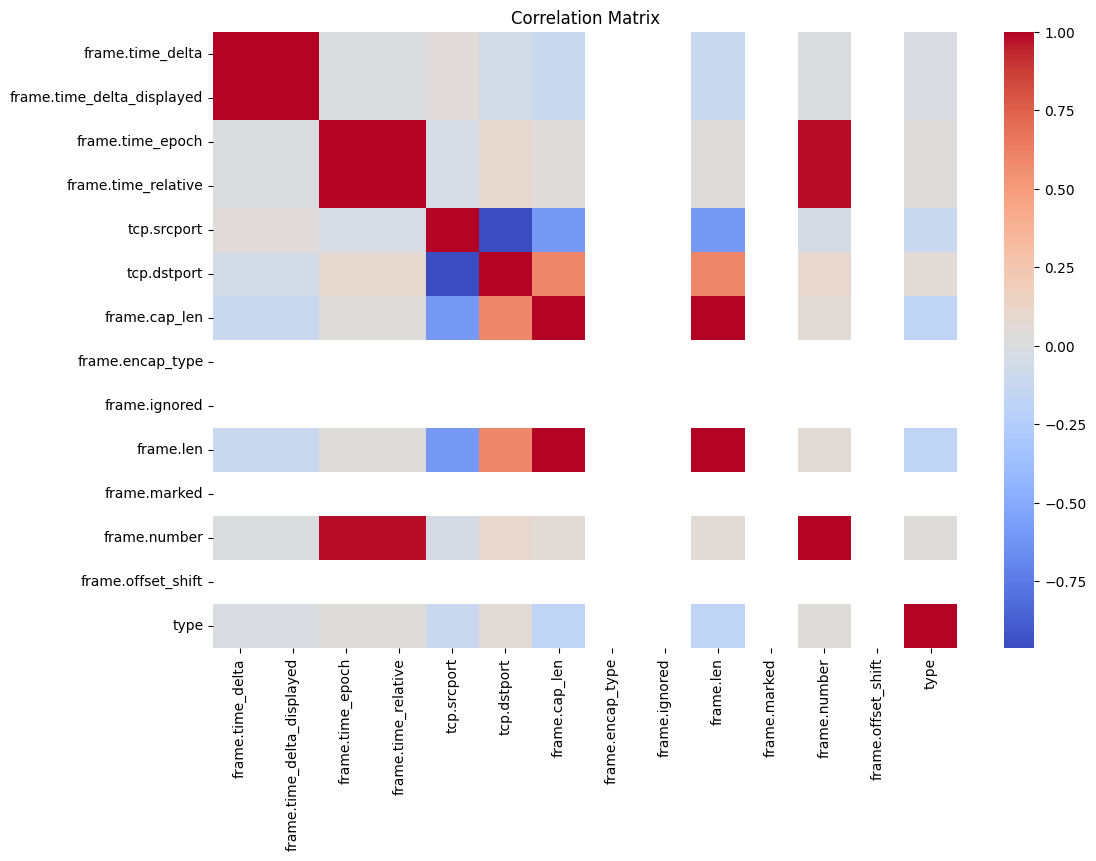

In [19]:
# Correlation analysis for numeric features
corr_matrix = data_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [21]:
data_cat.head()

,eth.src_18:a6:f7:eb:77:26,eth.src_30:5a:3a:62:72:80,eth.src_48:5a:3f:93:39:9c,eth.src_4c:74:03:07:92:4f,eth.src_60:01:94:37:e0:e1,eth.src_68:c6:3a:8b:d0:1e,eth.src_74:d4:35:ed:f7:06,eth.src_74:d4:35:ef:e5:5a,eth.src_a0:20:a6:17:44:ed,eth.src_b8:27:eb:73:32:30,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df = pd.concat([df, data_cat],axis=1)

In [23]:
df.columns

Index(['frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'eth.src', 'eth.dst',
       ...
       'ip.src_89.255.249.53', 'ip.src_91.189.89.198', 'ip.src_91.215.103.66',
       'ip.src_93.184.220.70', 'ip.src_93.93.51.190', 'ip.src_93.93.51.200',
       'ip.src_93.93.53.190', 'ip.src_93.93.53.191', 'ip.src_94.23.82.225',
       'ip.src_95.211.229.246'],
      dtype='object', length=522)

In [24]:
df.drop(columns=cat_col,inplace=True)

# Data Normalization

In [25]:
num_col = list(df.select_dtypes(include='number').columns)
num_col.remove('type')

In [26]:
num_col

['frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_epoch',
 'frame.time_relative',
 'tcp.srcport',
 'tcp.dstport',
 'frame.cap_len',
 'frame.encap_type',
 'frame.ignored',
 'frame.len',
 'frame.marked',
 'frame.number',
 'frame.offset_shift']

In [27]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))

In [28]:
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [29]:
df.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,eth.dst,frame.cap_len,frame.encap_type,frame.ignored,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.000000,0.000000,1.529668e+09,0.000000,22.0,53940.0,30:5a:3a:62:72:80,134.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.000481,0.000481,1.529668e+09,0.000481,22.0,53940.0,30:5a:3a:62:72:80,150.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.000423,0.000423,1.529668e+09,0.000904,22.0,53940.0,30:5a:3a:62:72:80,118.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.000274,0.000274,1.529668e+09,0.001178,53940.0,22.0,18:a6:f7:eb:77:26,66.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.000861,0.000861,1.529668e+09,0.002039,53940.0,22.0,18:a6:f7:eb:77:26,66.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df_normalization = df.copy()
df_normalization = normalization(df.copy(),num_col)

In [32]:
df_normalization = df_normalization.drop(columns=['eth.dst'])

In [33]:
df_normalization.columns

Index(['frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'tcp.srcport', 'tcp.dstport', 'frame.cap_len',
       'frame.encap_type', 'frame.ignored', 'frame.len',
       ...
       'ip.src_89.255.249.53', 'ip.src_91.189.89.198', 'ip.src_91.215.103.66',
       'ip.src_93.184.220.70', 'ip.src_93.93.51.190', 'ip.src_93.93.51.200',
       'ip.src_93.93.53.190', 'ip.src_93.93.53.191', 'ip.src_94.23.82.225',
       'ip.src_95.211.229.246'],
      dtype='object', length=518)

In [34]:
df_normalization['type'].value_counts()

type
0    106813
1      3855
Name: count, dtype: int64

In [37]:
# changing attack labels into two categories 'normal' and 'mitm'
bin_label = pd.DataFrame(df_normalization.type.map(lambda x:'normal' if x==0 else 'mitm'))

In [38]:
bin_label['type'] = bin_label['type'].map({'normal': 0, 'mitm': 1})

In [39]:
bin_label.value_counts()

type
0       106813
1         3855
Name: count, dtype: int64

In [40]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = df_normalization.copy()

# Menambahkan kolom 'type' dengan bin_label
bin_data['type'] = bin_label

In [42]:
import pandas as pd

# Contoh: Salin DataFrame normalisasi
bin_data = df_normalization.copy()

# Pastikan bin_label adalah Series atau list dengan panjang yang sesuai
if isinstance(bin_label, (list, np.ndarray)):
    bin_label = pd.Series(bin_label)

# Cek apakah panjang bin_label sama dengan bin_data
if len(bin_data) == len(bin_label):
    bin_data['type'] = bin_label
else:
    print("Panjang bin_label tidak sesuai dengan jumlah baris bin_data.")

# Menampilkan beberapa baris untuk memeriksa
print(bin_data.head())
print(bin_data.columns)  # Memeriksa semua kolom dalam bin_data

   frame.time_delta  frame.time_delta_displayed  frame.time_epoch  \
0          0.000000                    0.000000      0.000000e+00   
1          0.000049                    0.000049      1.022127e-07   
2          0.000043                    0.000043      1.920853e-07   
3          0.000028                    0.000028      2.502929e-07   
4          0.000087                    0.000087      4.332396e-07   

   frame.time_relative  tcp.srcport  tcp.dstport  frame.cap_len  \
0         0.000000e+00     0.000000     0.884525       0.076305   
1         1.021975e-07     0.000000     0.884525       0.087015   
2         1.920719e-07     0.000000     0.884525       0.065596   
3         2.502883e-07     0.884525     0.000000       0.030790   
4         4.332240e-07     0.884525     0.000000       0.030790   

   frame.encap_type  frame.ignored  frame.len  ...  ip.src_89.255.249.53  \
0               0.0            0.0   0.076305  ...                 False   
1               0.0           

In [43]:
bin_data['type'].value_counts()

type
0    106813
1      3855
Name: count, dtype: int64

In [44]:
bin_label.head()

,type
0,0
1,0
2,0
3,0
4,0


In [45]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['type'] = enc_label

In [46]:
le1.classes_

array([0, 1])

In [47]:
le1.value_counts()

AttributeError: 'LabelEncoder' object has no attribute 'value_counts'

In [ ]:
# Feature importance using RandomForestClassifier
y = df_raw['type']  # Assuming 'type' is the label column
X = df_raw

# Encode categorical columns for RandomForest
for col in cat_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# Split data for feature importance analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Data Visualization

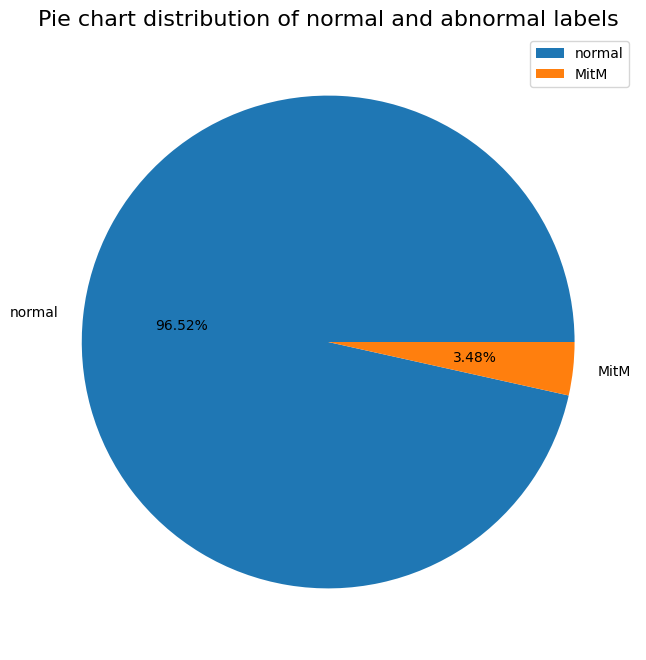

In [52]:
plt.figure(figsize=(8,8))
plt.pie(df_raw.type.value_counts(),labels=['normal','MitM'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
# plt.savefig('/content/gdrive/My Drive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/plot/Pie_chart_binary2.png')
plt.show()

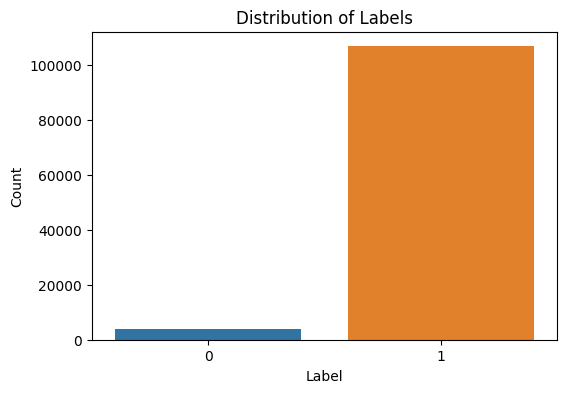

In [53]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_raw)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [54]:

df.shape

(110668, 519)

In [ ]:
# Feature importance using RandomForestClassifier
y = df['type']  # Assuming 'type' is the label column
X = df

# Encode categorical columns for RandomForest
for col in cat_col:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# Split data for feature importance analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

In [ ]:
df.head()

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

In [ ]:
# Correlation analysis for numeric features
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
numeric_df.info()

In [ ]:
# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Create time-difference features from timestamp columns
numeric_df['time_diff'] = numeric_df['frame.time_delta'].diff().fillna(0)
numeric_df['time_since_epoch'] = numeric_df['frame.time_epoch'] - numeric_df['frame.time_epoch'].min()

In [ ]:
numeric_df


In [ ]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df.columns

In [ ]:
# Balance classes if needed (assuming binary classification 'normal' and 'MitM')
df_majority = df[df.type == 'normal']
df_minority = df[df.type == 'MitM']

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Data Spliting

In [ ]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
bin_data

In [ ]:
X_bin = bin_data.drop(columns=['type'],axis=1)
y_bin = bin_data['type']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

In [ ]:
X_test_bin

# SMOTE

In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [58]:
X = bin_data.drop(columns=['type'],axis=1)
y = bin_label

In [59]:
y.head()

,type
0,0
1,0
2,0
3,0
4,0


In [60]:
X.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.884525,0.076305,0.0,0.0,0.076305,...,False,False,False,False,False,False,False,False,False,False
1,0.000049,0.000049,1.022127e-07,1.021975e-07,0.000000,0.884525,0.087015,0.0,0.0,0.087015,...,False,False,False,False,False,False,False,False,False,False
2,0.000043,0.000043,1.920853e-07,1.920719e-07,0.000000,0.884525,0.065596,0.0,0.0,0.065596,...,False,False,False,False,False,False,False,False,False,False
3,0.000028,0.000028,2.502929e-07,2.502883e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False
4,0.000087,0.000087,4.332396e-07,4.332240e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
29334,0.000005,0.000005,0.267485,0.267485,0.006907,0.665797,0.046854,0.0,0.0,0.046854,...,False,False,False,False,False,False,False,False,False,False
73708,0.000006,0.000006,0.655324,0.655324,0.926342,0.006907,0.038822,0.0,0.0,0.038822,...,False,False,False,False,False,False,False,False,False,False
48869,0.000402,0.000402,0.400053,0.400053,0.863560,0.006907,0.049531,0.0,0.0,0.049531,...,False,False,False,False,False,False,False,False,False,False
44163,0.005940,0.005940,0.359819,0.359819,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
23787,0.000006,0.000006,0.242490,0.242490,0.601933,0.006907,0.038822,0.0,0.0,0.038822,...,False,False,False,False,False,False,False,False,False,False


In [63]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Melatih model dengan data yang telah di-resample
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Menguji model
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

/tmp/ipykernel_29/2274833275.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled, y_resampled)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     21390
           1       0.81      0.95      0.88       744

    accuracy                           0.99     22134
   macro avg       0.90      0.97      0.94     22134
weighted avg       0.99      0.99      0.99     22134



In [64]:
print("Distribusi label sebelum SMOTE:", Counter(y_train))
print("Distribusi label setelah SMOTE:", Counter(y_resampled))

Distribusi label sebelum SMOTE: Counter({'type': 1})
Distribusi label setelah SMOTE: Counter({'type': 1})


In [65]:
X_resampled

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.000005,0.000005,0.267485,0.267485,0.006907,0.665797,0.046854,0.0,0.0,0.046854,...,False,False,False,False,False,False,False,False,False,False
1,0.000006,0.000006,0.655324,0.655324,0.926342,0.006907,0.038822,0.0,0.0,0.038822,...,False,False,False,False,False,False,False,False,False,False
2,0.000402,0.000402,0.400053,0.400053,0.863560,0.006907,0.049531,0.0,0.0,0.049531,...,False,False,False,False,False,False,False,False,False,False
3,0.005940,0.005940,0.359819,0.359819,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
4,0.000006,0.000006,0.242490,0.242490,0.601933,0.006907,0.038822,0.0,0.0,0.038822,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170841,0.000003,0.000003,0.603987,0.603987,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170842,0.000003,0.000003,0.342446,0.342446,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170843,0.000969,0.000969,0.342267,0.342267,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170844,0.000972,0.000972,0.147220,0.147220,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False


In [66]:
y_resampled

,type
0,0
1,0
2,0
3,0
4,0
...,...
170841,1
170842,1
170843,1
170844,1


In [67]:
# Mengonversi X_resampled menjadi DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Mengonversi y_resampled menjadi DataFrame dengan kolom 'type'
y_resampled_df = pd.DataFrame(y_resampled, columns=['type'])

# Menggabungkan DataFrame
combined_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [68]:
combined_df

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246,type
0,0.000005,0.000005,0.267485,0.267485,0.006907,0.665797,0.046854,0.0,0.0,0.046854,...,False,False,False,False,False,False,False,False,False,0
1,0.000006,0.000006,0.655324,0.655324,0.926342,0.006907,0.038822,0.0,0.0,0.038822,...,False,False,False,False,False,False,False,False,False,0
2,0.000402,0.000402,0.400053,0.400053,0.863560,0.006907,0.049531,0.0,0.0,0.049531,...,False,False,False,False,False,False,False,False,False,0
3,0.005940,0.005940,0.359819,0.359819,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,0
4,0.000006,0.000006,0.242490,0.242490,0.601933,0.006907,0.038822,0.0,0.0,0.038822,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170841,0.000003,0.000003,0.603987,0.603987,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
170842,0.000003,0.000003,0.342446,0.342446,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
170843,0.000969,0.000969,0.342267,0.342267,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
170844,0.000972,0.000972,0.147220,0.147220,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1


In [69]:
mitm_df = combined_df[combined_df['type'] == 1]

In [70]:
mitm_df

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246,type
12,0.001772,0.001772,0.342479,0.342479,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
17,0.001064,0.001064,0.743333,0.743333,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
35,0.001044,0.001044,0.743373,0.743373,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
54,0.000003,0.000003,0.603794,0.603794,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
56,0.000690,0.000690,0.370235,0.370235,0.030530,0.806421,0.022758,0.0,0.0,0.022758,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170841,0.000003,0.000003,0.603987,0.603987,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
170842,0.000003,0.000003,0.342446,0.342446,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
170843,0.000969,0.000969,0.342267,0.342267,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1
170844,0.000972,0.000972,0.147220,0.147220,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,1


In [71]:
combined_df = pd.concat([bin_data, mitm_df], axis=0, ignore_index=True)

In [72]:
combined_df['type'].value_counts()

type
0    106813
1     89278
Name: count, dtype: int64

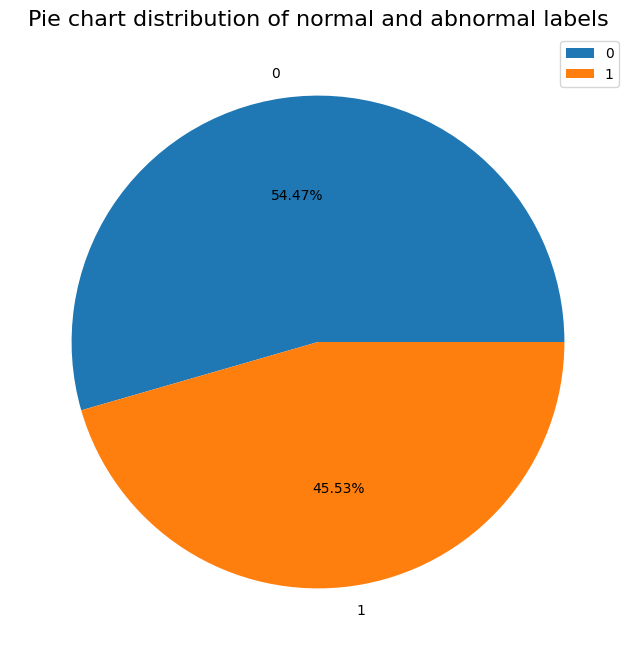

In [73]:
plt.figure(figsize=(8,8))
plt.pie(combined_df.type.value_counts(),labels=['0','1'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
# plt.savefig('/content/gdrive/My Drive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/plot/Pie_chart_binary2.png')
plt.show()

In [74]:
bin_data

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.884525,0.076305,0.0,0.0,0.076305,...,False,False,False,False,False,False,False,False,False,False
1,0.000049,0.000049,1.022127e-07,1.021975e-07,0.000000,0.884525,0.087015,0.0,0.0,0.087015,...,False,False,False,False,False,False,False,False,False,False
2,0.000043,0.000043,1.920853e-07,1.920719e-07,0.000000,0.884525,0.065596,0.0,0.0,0.065596,...,False,False,False,False,False,False,False,False,False,False
3,0.000028,0.000028,2.502929e-07,2.502883e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False
4,0.000087,0.000087,4.332396e-07,4.332240e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110663,0.000080,0.000080,9.999996e-01,9.999996e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
110664,0.000012,0.000012,9.999996e-01,9.999996e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
110665,0.000080,0.000080,9.999998e-01,9.999998e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
110666,0.000012,0.000012,9.999998e-01,9.999998e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False


# Import Transformer

In [118]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [120]:
!pip install transformers tensorflow

# BERT

# Classification Non-tuning

In [ ]:
X_bin.columns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding dan Normalization
#le = LabelEncoder()
#y_bin = le.fit_transform(bin_data['label'].values)  # Encode labels
class_names = le1.classes_  # Save the original class names

# Normalize feature data
scaler = StandardScaler()
X_bin = scaler.fit_transform(bin_data.drop(columns=['type']).values)
y_bin = bin_data['type'].values

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self):
        super(MitMDetectionModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, 2)  # Assuming binary classification

    def forward(self, input_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=(input_ids != 0))
        pooled_output = outputs[1]  # CLS token output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_bin)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_bin[train_index], X_bin[val_index]
    y_train, y_val = y_bin[train_index], y_bin[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        scheduler.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    #print(classification_report(y_val, y_pred.numpy(), target_names=class_names))
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# After SMOTE

# Data Splitting

In [77]:
X_bin = combined_df.drop(columns=['type'],axis=1)
y_bin = combined_df['type']

In [78]:
y_bin.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

In [79]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = le1.fit_transform(y_bin)
# enc_label = y_bin.apply(le1.fit_transform)
combined_df['type'] = enc_label

In [80]:
y_bin

0         0
1         0
2         0
3         0
4         0
         ..
196086    1
196087    1
196088    1
196089    1
196090    1
Name: type, Length: 196091, dtype: int64

In [81]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding dan Normalization
le = LabelEncoder()
y_bin = le.fit_transform(combined_df['type'].values)  # Encode labels
class_names = le1.classes_  # Save the original class names

# Normalize feature data
scaler = StandardScaler()
X_bin = scaler.fit_transform(combined_df.drop(columns=['type']).values)
y_bin = combined_df['type'].values

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MitMDetectionModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_bert(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_bin)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_bin[train_index], X_bin[val_index]
    y_train, y_val = y_bin[train_index], y_bin[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        scheduler.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    #print(classification_report(y_val, y_pred.numpy(), target_names=class_names))
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

Fold 1


NameError: name 'MitMDetectionModel' is not defined

# Hyperparameter tuning

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Reinitialize model with new hyperparameters, ensuring consistent d_model
    model = TransformerModel(input_dim=X_bin.shape[1], num_classes=len(class_names),
                             d_model=128, nhead=nhead, num_layers=3, dropout=0.3) # Keep d_model consistent


    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train for 2 epochs (for quick demonstration)
    for epoch in range(2):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')


Classification using Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding dan Normalization
#le = LabelEncoder()
#y_bin = le.fit_transform(bin_data['label'].values)  # Encode labels
class_names = le1.classes_  # Save the original class names

# Normalize feature data
scaler = StandardScaler()
X_bin = scaler.fit_transform(bin_data.drop(columns=['label']).values)
y_bin = bin_data['label'].values

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4, batch_first=True),
            num_layers=2
        )
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_bin)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_bin[train_index], X_bin[val_index]
    y_train, y_val = y_bin[train_index], y_bin[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        scheduler.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    #print(classification_report(y_val, y_pred.numpy(), target_names=class_names))
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()